In [23]:
import numpy as np
import scipy.linalg
from tqdm import tqdm
import matplotlib.pyplot as plt

In [12]:
def simulate_fBm(n_paths: int, n_increments: int, H: float) -> np.ndarray:

    if H < 0 or H > 1:
        print("0 <= H <= 1 not satisfied")

    else:
        control = np.zeros(n_paths)
        fBm_paths = np.zeros((n_paths,n_increments))

        for k in tqdm(range(n_paths)):

            cov = np.zeros((n_increments,n_increments))

            # covariance matrix of fBm with Hurst index H
            for i in range(1, n_increments+1):
                for j in range(1, n_increments+1):
                    cov[i-1,j-1] = (pow(j, 2*H) + pow(i, 2*H) - pow(abs(i-j), 2*H))/2

            # eigendecomposition
            lambd, P = np.linalg.eig(cov)
            lambd = np.diag(np.sqrt(lambd))
            sigma = np.matmul(np.matmul(P, lambd), np.linalg.inv(P))

            control[k] = np.all(np.matmul(sigma, sigma) - cov < 1e-06)

            normal = np.random.normal(size=n_increments)

            fBm_paths[k, :] = sigma.dot(normal)

        return fBm_paths

In [32]:
paths = simulate_fBm(3,1000,0.9)

100%|██████████| 3/3 [00:10<00:00,  3.42s/it]


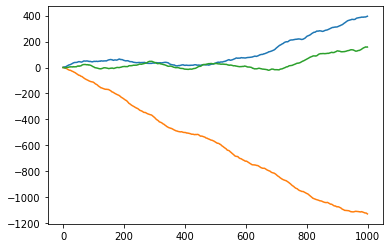

In [33]:
for i in range(paths.shape[0]):
    plt.plot(paths[i])
plt.show()